<a href="https://colab.research.google.com/github/jintubhuyan-2000/Random/blob/main/GEE_Split_Window.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install earthengine-api --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install Py6S

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 4.1 MB/s eta 0:00:00
  Created wheel for Py6S: filename=Py6S-1.9.2-py3-none-any.whl size=92227 sha256=35fbc5d505ecb18b43de25d4a84589dee2bce896d1fc75aa591d3a731145c10f
  Stored in directory: /root/.cache/pip/wheels/32/38/16/78463400cda5d89e01116a56729a45243739f18faff7e948f0
Successfully built Py6S


In [5]:
import datetime
import math
import os
import sys

In [6]:
import ee
from Py6S import *

In [7]:
pip install geemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 40.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.0 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none

In [8]:
import ee
import geemap

In [9]:
ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=s2xWXaEmVKbWPVBn2VxAEKddlatwzExHCxxkrdqzZzA&tc=aunCz8uBMoKSRd2uCCa6La1XR_AzflL7dW4_XMPkP9o&cc=o-Xp0vg1x98HSSSMQjB1tGIlC6vl0GtA7oraypl1DXw

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VOISSiPF_F4qtHJjGRl1WozLO9mFNPfHgbCR9L3OnWSAcgpJFAMUHY

Successfully saved authorization token.


In [232]:
startDate = ee.Date('2018-04-01')
endDate = ee.Date('2018-12-01')
Map = geemap.Map()
featureCollection= ee.FeatureCollection('users/Jintu_moni_Bhuyan/Bihpuria').geometry()
jharkhand=featureCollection

L8_col= ee.ImageCollection('LANDSAT/LC08/C02/T1_TOA')
filter_L8= L8_col.filter(ee.Filter.date('2019-01-01', '2019-02-01')).filterBounds(jharkhand).mean()
jh= filter_L8

#Map.addLayer(jharkhand,{},'jharkhand')
#Map.addLayer(jh,{'band':['B4','B3','B2'],'min':0,'max':0.25},'jh')
Map.centerObject(jharkhand,6)


In [234]:
band_names = jh.bandNames()
print('Band names:', band_names.getInfo())

Band names: ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'B10', 'B11', 'QA_PIXEL', 'QA_RADSAT', 'SAA', 'SZA', 'VAA', 'VZA']


In [233]:
Map.addLayer(jh,{'min':0,'max':0.4},'jh')

In [180]:
Map.setControlVisibility(layerControl=True,fullscreenControl=True,latLngPopup=True)
Map

Map(center=[27.006178432347248, 93.72376348935549], controls=(WidgetControl(options=['position', 'transparent_…

In [141]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [142]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio.plot
import rasterio

In [143]:
cloudImage = ee.Image.loadGeoTIFF(jh)

In [146]:
#calculating NDVI
ndvi = ee.Image(jh.normalizedDifference(['B5', 'B4']))
timedate = jh.get('GENERATION_TIME').getInfo()

In [147]:
Map.addLayer(ndvi,{'min':-0.2,'max':0.8},'ndvi')

In [148]:
Map.setControlVisibility(layerControl=True,fullscreenControl=True,latLngPopup=True)
Map

Map(bottom=27988.0, center=[26.86328062676624, 93.38378906250001], controls=(WidgetControl(options=['position'…

In [149]:
import numpy as np
from osgeo import gdal
from osgeo import osr
import time


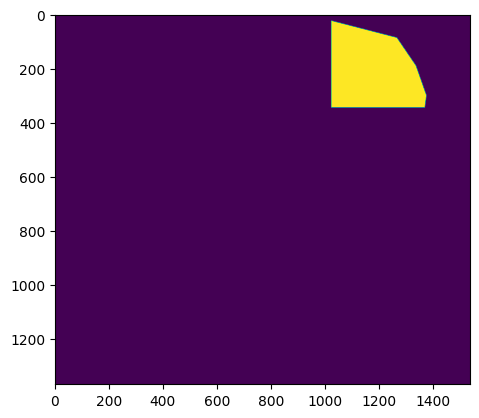

In [150]:
# Define the area
#area = ee.Geometry.Polygon([[[105.532,19.059],[105.606,19.058],[105.605,19.108],[105.530,19.110],[105.532,19.059]]])

# define the image
#img = ee.Image("COPERNICUS/S2/20160209T034234_20160209T090731_T48QWG")

# do any ee operation here
#ndvi = ee.Image(img.normalizedDifference(['B8', 'B4']))
#timedate = img.get('GENERATION_TIME').getInfo()

# get the lat lon and add the ndvi
latlon = ee.Image.pixelLonLat().addBands(ndvi)

# apply reducer to list
latlon = latlon.reduceRegion(
  reducer=ee.Reducer.toList(),
  geometry=jharkhand,
  maxPixels=1e8,
  scale=20);


# get data into three different arrays
data = np.array((ee.Array(latlon.get("nd")).getInfo()))
lats = np.array((ee.Array(latlon.get("latitude")).getInfo()))
lons = np.array((ee.Array(latlon.get("longitude")).getInfo()))

# get the unique coordinates
uniqueLats = np.unique(lats)
uniqueLons = np.unique(lons)

# get number of columns and rows from coordinates
ncols = len(uniqueLons)
nrows = len(uniqueLats)

# determine pixelsizes
ys = uniqueLats[1] - uniqueLats[0]
xs = uniqueLons[1] - uniqueLons[0]

# create an array with dimensions of image
arr = np.zeros([nrows, ncols], np.float32) #-9999

# fill the array with values
counter =0
for y in range(0,len(arr),1):
    for x in range(0,len(arr[0]),1):
        if lats[counter] == uniqueLats[y] and lons[counter] == uniqueLons[x] and counter < len(lats)-1:
            counter+=1
            arr[len(uniqueLats)-1-y,x] = data[counter] # we start from lower left corner

# in case you want to plot the image
import matplotlib.pyplot as plt
plt.imshow(arr)
plt.show()



In [44]:
pip install geemap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
import geemap

In [235]:
out_dir =os.path.join(os.path.expanduser('~'),'Downloads')
filename=os.path.join(out_dir,'landsat.tif')

In [236]:
geemap.ee_export_image(jh, filename,region=jharkhand, scale=100,file_per_band=True)

Generating URL ...
Please wait ...
Data downloaded to /root/Downloads


In [238]:
url="/root/Downloads/landsat"


In [249]:
redband ='.B4.tif'
nirband ='.B5.tif'
greenband ='.B3.tif'
band10 ='.B10.tif'
band11 ='.B11.tif'


In [250]:
print(redband)

.B4.tif


In [251]:
with rasterio.open(url+redband) as src:
    redImage = src.read(1).astype('f4')

with rasterio.open(url+nirband) as src:
    nirImage = src.read(1).astype('f4')

with rasterio.open(url+greenband) as src:
    greenImage = src.read(1).astype('f4')



In [252]:
rgb_image = np.concatenate(
    (np.expand_dims(nirImage, axis=0),
    np.expand_dims(redImage, axis=0),
    np.expand_dims(greenImage, axis=0)),
    axis=0
)

In [253]:
normed_rgb = rgb_image  / np.max(rgb_image)

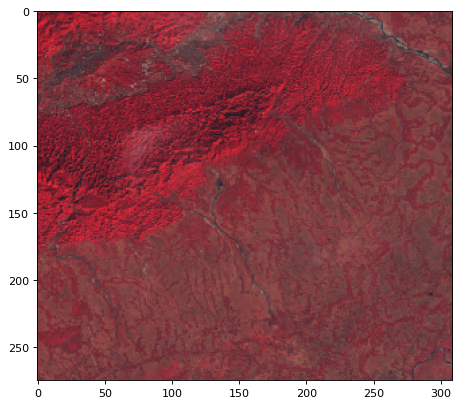

<Axes: >

In [254]:
from rasterio.plot import show


figure(figsize = (20, 6), dpi = 80)
show(normed_rgb)

In [255]:
with rasterio.open(url+nirband) as src:
    nirImage = src.read(1).astype('f4')

with rasterio.open(url+band10) as src:
    band10Image = src.read(1).astype('f4')

with rasterio.open(url+band11) as src:
    band11Image = src.read(1).astype('f4')

In [256]:
pip install pylandtemp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [257]:
from pylandtemp import split_window

In [258]:
method = 'jiminez-munoz'
lst_image_split_window = split_window(
    band10Image,
    band11Image,
    redImage,
    nirImage,
    lst_method=method,
    emissivity_method='avdan',
    unit='celcius'
)

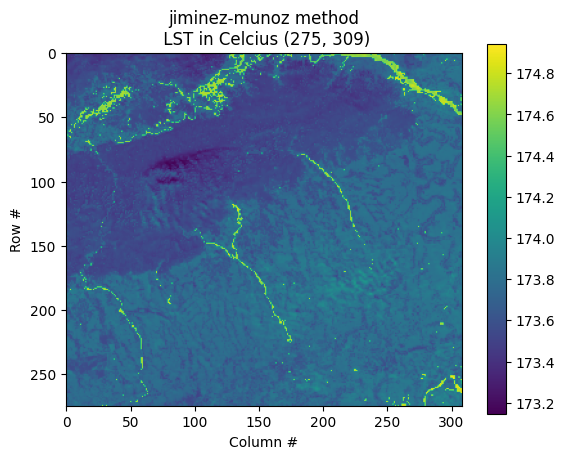

In [259]:
plt.imshow(lst_image_split_window, cmap='viridis')
plt.colorbar()
plt.title('{}\n LST in Celcius {}'.format(f'{method} method', lst_image_split_window.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()